In [12]:
import pandas as pd
import sys
sys.path.insert(1, '../scripts/')
import utils
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the transcript counts
transcript_counts = pd.read_csv('../data/transcriptomics/isoquant/isoquant_aln.sorted.transcript_model_grouped_counts.tsv', sep = '\t')
transcript_counts = transcript_counts.rename(columns = {'s1':'Sample 1', 's2':'Sample 2', 's3': 'Sample 3'})
transcript_counts.head()

,#feature_id,Sample 1,Sample 2,Sample 3
0,ENST00000003583.12,6.0,24.0,19.0
1,ENST00000010299.10,0.0,1.0,0.0
2,ENST00000040877.2,1.0,1.0,4.0
3,ENST00000054650.9,1.0,17.0,13.0
4,ENST00000054666.11,32.0,42.0,86.0


In [8]:
sample1 = transcript_counts[(transcript_counts['Sample 1'] != 0) & (transcript_counts['Sample 2'] == 0) & (transcript_counts['Sample 3'] == 0)]
sample2 = transcript_counts[(transcript_counts['Sample 1'] == 0) & (transcript_counts['Sample 2'] != 0) & (transcript_counts['Sample 3'] == 0)]
sample3 = transcript_counts[(transcript_counts['Sample 1'] == 0) & (transcript_counts['Sample 2'] == 0) & (transcript_counts['Sample 3'] != 0)]

for name in [sample1,sample2,sample3]:
    known_transcripts = len(name[name['#feature_id'].str.startswith('ENST')])
    novel_transcripts = len(name[name['#feature_id'].str.startswith('transcript')])
    print(' known: ', known_transcripts, ' novel: ', novel_transcripts)

 known:  2730  novel:  0
 known:  3336  novel:  8
 known:  3247  novel:  0


In [10]:
# How many of these transcripts belong to IRD genes?
ird_genes = utils.ird_gene_list()
isoforms = pd.read_csv('/mnt/xomics/tabear/atlas_paper/Neural-Retina-Atlas/data/transcriptomics/isoquant/isoquant_transcript.SQANTI-like_with_genename.tsv', sep = '\t')

isoforms_onesample = pd.concat([sample1,sample2,sample3])
isoforms_onesample['#feature_id'] = isoforms_onesample['#feature_id'].str.upper()

single_sample = isoforms[isoforms['isoform'].isin(isoforms_onesample['#feature_id'])]
single_sample_ird = single_sample[single_sample['gene_symbol'].isin(ird_genes)]
print('Number of single sample transcripts in IRD genes: ', len(single_sample_ird))

novel_single_sample = single_sample_ird[single_sample_ird['isoform'].str.startswith('TRA')]
print('Number of novel single sample transcripts in IRD genes: ', len(novel_single_sample))

Number of single sample transcripts in IRD genes:  141
Number of novel single sample transcripts in IRD genes:  0


average single sample transcript length:  1981.839716768587


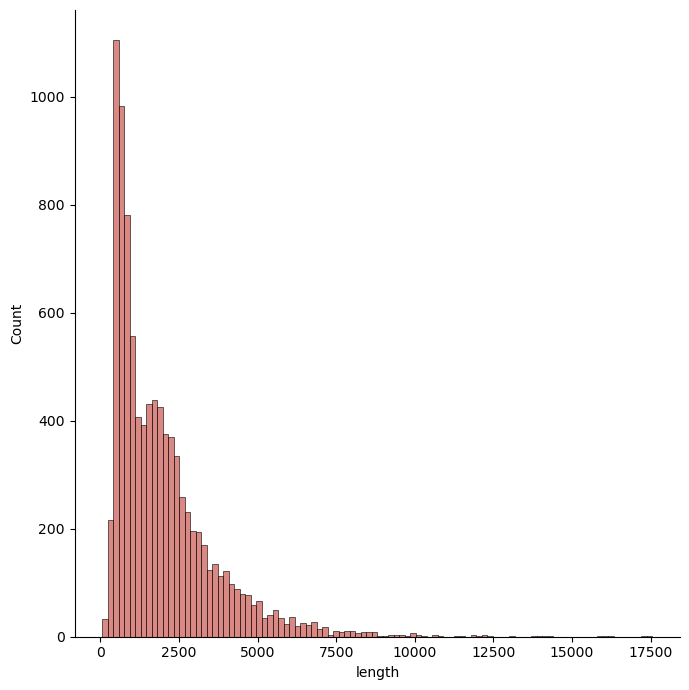

In [13]:
# Expression and length of single sample transcripts
print('average single sample transcript length: ', np.mean(single_sample['length']))

ax = sns.displot(data=single_sample, x='length', alpha=0.7 , height=7, color = '#cb564f')
plt.show()

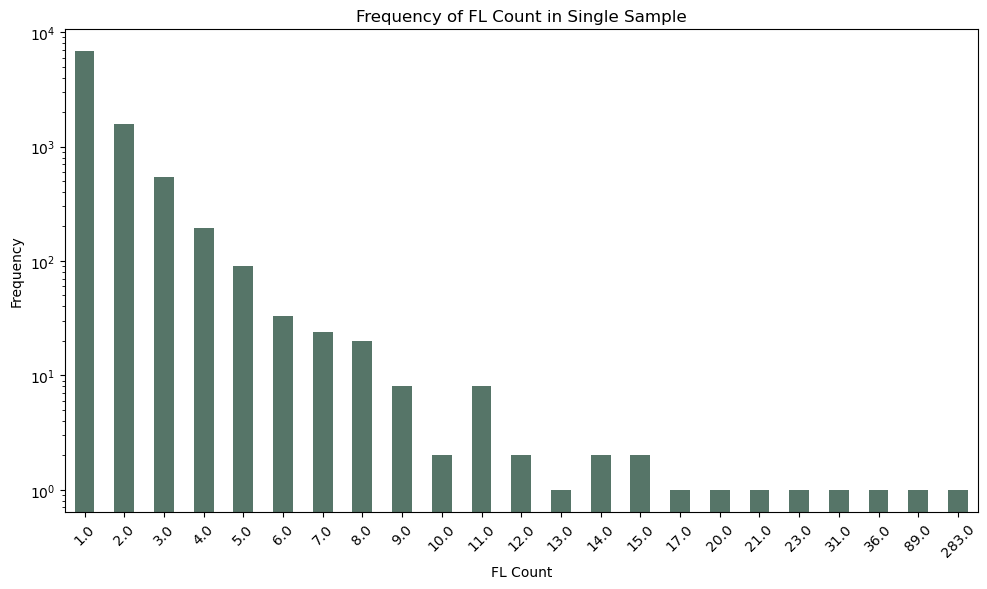

In [14]:
counts = single_sample['FL_count'].value_counts()

# Sort the counts in ascending order
counts_sorted = counts.sort_index()

plt.figure(figsize=(10, 6))
counts_sorted.plot(kind='bar', color='#567568')

plt.yscale('log')
plt.xlabel('FL Count')
plt.ylabel('Frequency')
plt.title('Frequency of FL Count in Single Sample')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()